In [1]:
import matplotlib.pyplot as plt
import numpy as np
from qiskit import QuantumCircuit, Aer, transpile, assemble
from qiskit.visualization import plot_histogram
from math import gcd
from numpy.random import randint
import pandas as pd
from fractions import Fraction

In [19]:
class ShorSims:
    
    def __init__(self, N, a):
        '''
        Inputs:
            N: The number to be factored
            a: The random number between 1 and N-1
        '''
        self.N = N
        self.a = a
    
    # This method will get the quantum circuit prepared based on the value of N and a
    def prepare_circuit(self):
        N = self.N
        a = self.a
        
        # This program only works with certain primes
        if N not in [15, 51, 85, 771, 1285, 4369, 196611, 327685, 1114129, 16843009]:
            raise ValueError('N must be 15, 51, 85, 771, 1285, 4369, 196611, 327685, 1114129, 16843009')
            
        r = ShorSims.order(N,a)
        
        if N == 15:
            qc  = QuantumCircuit(4,2)
            n_count = 2
            
            setattr(self, 'n_count', n_count)
            setattr(self, 'qc', qc)
            
            for i in range(2):
                qc.h(i)
                
            for j in range(int(np.log2(r))-1,-1,-1):
                qc.cx(1-j, 3-j)
            
            qc.append(ShorSims.qft_dagger(2), range(2))
            qc.measure(range(2), range(1,-1,-1))
            return qc
        
        elif N == 51:
            qc = QuantumCircuit(8,4)
            n_count = 4
            
            setattr(self, 'n_count', n_count)
            setattr(self, 'qc', qc)
            
            for i in range(4):
                qc.h(i)
                
            for j in range(int(np.log2(r))-1,-1,-1):
                qc.cx(3-j, 7-j)
            
            qc.append(ShorSims.qft_dagger(4), range(4))
            qc.measure(range(4),range(3,-1,-1))
            return qc
        
        elif N == 85:
            qc = QuantumCircuit(8,4)
            n_count = 4
            
            setattr(self, 'n_count', n_count)
            setattr(self, 'qc', qc)
            
            for i in range(4):
                qc.h(i)
                
            for j in range(int(np.log2(r))-1,-1,-1):
                qc.cx(3-j, 7-j)
            
            qc.append(ShorSims.qft_dagger(4), range(4))
            qc.measure(range(4),range(3,-1,-1))
            return qc
        
        elif N == 771:
            qc = QuantumCircuit(16,8)
            n_count = 8
            
            setattr(self, 'n_count', n_count)
            setattr(self, 'qc', qc)
            
            for i in range(8):
                qc.h(i)
                
            for j in range(int(np.log2(r))-1,-1,-1):
                qc.cx(7-j, 15-j)
            
            qc.append(ShorSims.qft_dagger(8), range(8))
            qc.measure(range(8),range(7,-1,-1))
            return qc
        
        elif N == 1285:
            qc = QuantumCircuit(18,9)
            n_count = 9
            
            setattr(self, 'n_count', n_count)
            setattr(self, 'qc', qc)
            
            for i in range(9):
                qc.h(i)
                
            for j in range(int(np.log2(r))-1,-1,-1):
                qc.cx(8-j, 17-j)
                
            qc.append(ShorSims.qft_dagger(9), range(9))
            qc.measure(range(9),range(8,-1,-1))
            return qc
        
        elif N == 4369:
            qc = QuantumCircuit(22, 11)
            n_count = 11
            
            setattr(self, 'n_count', n_count)
            setattr(self, 'qc', qc)
            
            for i in range(11):
                qc.h(i)
                
            for j in range(int(np.log2(r))-1,-1,-1):
                qc.cx(10-j, 21-j)
            
            qc.append(ShorSims.qft_dagger(11), range(11))
            qc.measure(range(11), range(10,-1,-1))
            return qc
        
        # DON'T RUN THIS SHIT!!!
        elif N == 196611:
            qc = QuantumCircuit(32,16)
            n_count = 16
            
            setattr(self, 'n_count', n_count)
            setattr(self, 'qc', qc)
            
            for i in range(16):
                qc.h(i)
                
            for j in range(int(np.log2(r))-1,-1,-1):
                qc.cx(15-j,31-j)
                
            qc.append(ShorSims.qft_dagger(16), range(16))
            qc.measure(range(16), range(15,-1,-1))
            return qc
        
        # DON'T RUN THIS SHIT HERE!!!
        elif N == 327685:
            qc = QuantumCircuit(34, 17)
            n_count = 17
            
            setattr(self, 'n_count', n_count)
            setattr(self, 'qc', qc)
            
            for i in range(17):
                qc.h(i)
                
            for j in range(int(np.log2(r))-1,-1,-1):
                qc.cx(16-j, 33-j)
            
            qc.append(ShorSims.qft_dagger(17), range(17))
            qc.measure(range(17), range(16,-1,-1))
            return qc
        
        
        # DON'T RUN THIS SHIT HERE!!!
        elif N == 16843009: 
            qc = QuantumCircuit(46,23)
            n_count = 23
            
            setattr(self, 'n_count', n_count)
            setattr(self, 'qc', qc)
            
            for i in range(23):
                qc.h(i)
            
            for j in range(int(np.log2(r))-1,-1,-1):
                qc.cx(22-j, 45-j)
                
            qc.append(ShorSims.qft_dagger(23), range(23))
            qc.measure(range(23), range(22,-1,-1))
            return qc
    
    # This method will start simulation of measuring the circuit.
    # Lucily the factorization will be found.
    def measure_circuit(self):
        n_count = self.qc
        a = self.a
        qc = self.qc
        N = self.N
        
        factor_found = False
        attempt = 0
        while not factor_found:
            attempt += 1
            print("\nAttempt %i:" % attempt)
            phase = self.qpe_amodN() # Phase = s/r
            frac = Fraction(phase).limit_denominator(N) # Denominator should (hopefully!) tell us r
            r = frac.denominator
            print("Result: r = %i" % r)
            if phase != 0:
                # Guesses for factors are gcd(x^{r/2} ±1 , 15)
                guesses = [gcd(a**(r//2)-1, N), gcd(a**(r//2)+1, N)]
                print("Guessed Factors: %i and %i" % (guesses[0], guesses[1]))
                for guess in guesses:
                    if guess not in [1,N] and (N % guess) == 0: # Check to see if guess is a factor
                        print("*** Non-trivial factor found: %i ***" % guess)
                        factor_found = True
            
    # This method will spit out the phase
    def qpe_amodN(self):
        n_count = self.n_count
        qc = self.qc
        qc.measure(range(n_count), range(n_count))
        # Simulate Results
        aer_sim = Aer.get_backend('aer_simulator')
        # Setting memory=True below allows us to see a list of each sequential reading
        t_qc = transpile(qc, aer_sim)
        #qobj = assemble(t_qc, shots=1)
        result = aer_sim.run(t_qc, memory=True).result()
        readings = result.get_memory()
        print("Register Reading: " + readings[0])
        phase = int(readings[0],2)/(2**n_count)
        print("Corresponding Phase: %f" % phase)
        return phase
          
    @staticmethod
    def qft_dagger(n):
        """n-qubit QFTdagger the first n qubits in circ"""
        qc = QuantumCircuit(n)
        # Don't forget the Swaps!
        for qubit in range(n//2):
            qc.swap(qubit, n-qubit-1)
        for j in range(n):
            for m in range(j):
                qc.cp(-np.pi/float(2**(j-m)), m, j)
            qc.h(j)
        qc.name = "QFT†"
        return qc
    
    # This method offers us the order of 'a'
    @staticmethod
    def order(N,a):
        
        if np.gcd(N,a) != 1:
            raise ValueError("Couldn't find the period, N and a are not coprime")
        elif a >= N:
            raise ValueError("Couldn't find the period, a is larger than N")
        
        r = 1
        not_found = True
        while not_found:
            if np.mod(a**r, N) == 1:
                not_found = False
            else:
                r += 1
        return r

In [20]:
ss = ShorSims(771, 17)
qc = ss.prepare_circuit()
qc.draw()

┌───┐                         ┌───────┐┌─┐                     
 q_0: ┤ H ├─────────────────────────┤0      ├┤M├─────────────────────
      ├───┤                         │       │└╥┘┌─┐                  
 q_1: ┤ H ├─────────────────────────┤1      ├─╫─┤M├──────────────────
      ├───┤                         │       │ ║ └╥┘┌─┐               
 q_2: ┤ H ├─────────────────────────┤2      ├─╫──╫─┤M├───────────────
      ├───┤                         │       │ ║  ║ └╥┘┌─┐            
 q_3: ┤ H ├──■──────────────────────┤3      ├─╫──╫──╫─┤M├────────────
      ├───┤  │                      │  QFT† │ ║  ║  ║ └╥┘┌─┐         
 q_4: ┤ H ├──┼────■─────────────────┤4      ├─╫──╫──╫──╫─┤M├─────────
      ├───┤  │    │                 │       │ ║  ║  ║  ║ └╥┘┌─┐      
 q_5: ┤ H ├──┼────┼────■────────────┤5      ├─╫──╫──╫──╫──╫─┤M├──────
      ├───┤  │    │    │            │       │ ║  ║  ║  ║  ║ └╥┘┌─┐   
 q_6: ┤ H ├──┼────┼────┼────■───────┤6      ├─╫──╫──╫──╫──╫──╫─┤M├───
      ├───┤  │    │    │    │       │       │ ║  ║  ║  ║  ║  ║ └╥┘┌─┐
 q_7: ┤ H ├──┼────┼────┼────┼────■──┤7      ├─╫──╫──╫──╫──╫──╫──╫─┤M├
      └───┘  │    │    │    │    │  └───────┘ ║  ║  ║  ║  ║  ║  ║ └╥┘
 q_8: ───────┼────┼────┼────┼────┼────────────╫──╫──╫──╫──╫──╫──╫──╫─
             │    │    │    │    │            ║  ║  ║  ║  ║  ║  ║  ║ 
 q_9: ───────┼────┼────┼────┼────┼────────────╫──╫──╫──╫──╫──╫──╫──╫─
             │    │    │    │    │            ║  ║  ║  ║  ║  ║  ║  ║ 
q_10: ───────┼────┼────┼────┼────┼────────────╫──╫──╫──╫──╫──╫──╫──╫─
           ┌─┴─┐  │    │    │    │            ║  ║  ║  ║  ║  ║  ║  ║ 
q_11: ─────┤ X ├──┼────┼────┼────┼────────────╫──╫──╫──╫──╫──╫──╫──╫─
           └───┘┌─┴─┐  │    │    │            ║  ║  ║  ║  ║  ║  ║  ║ 
q_12: ──────────┤ X ├──┼────┼────┼────────────╫──╫──╫──╫──╫──╫──╫──╫─
                └───┘┌─┴─┐  │    │            ║  ║  ║  ║  ║  ║  ║  ║ 
q_13: ───────────────┤ X ├──┼────┼────────────╫──╫──╫──╫──╫──╫──╫──╫─
                     └───┘┌─┴─┐  │            ║  ║  ║  ║  ║  ║  ║  ║ 
q_14: ────────────────────┤ X ├──┼────────────╫──╫──╫──╫──╫──╫──╫──╫─
                          └───┘┌─┴─┐          ║  ║  ║  ║  ║  ║  ║  ║ 
q_15: ─────────────────────────┤ X ├──────────╫──╫──╫──╫──╫──╫──╫──╫─
                               └───┘          ║  ║  ║  ║  ║  ║  ║  ║ 
 c: 8/════════════════════════════════════════╩══╩══╩══╩══╩══╩══╩══╩═
                                              7  6  5  4  3  2  1  0

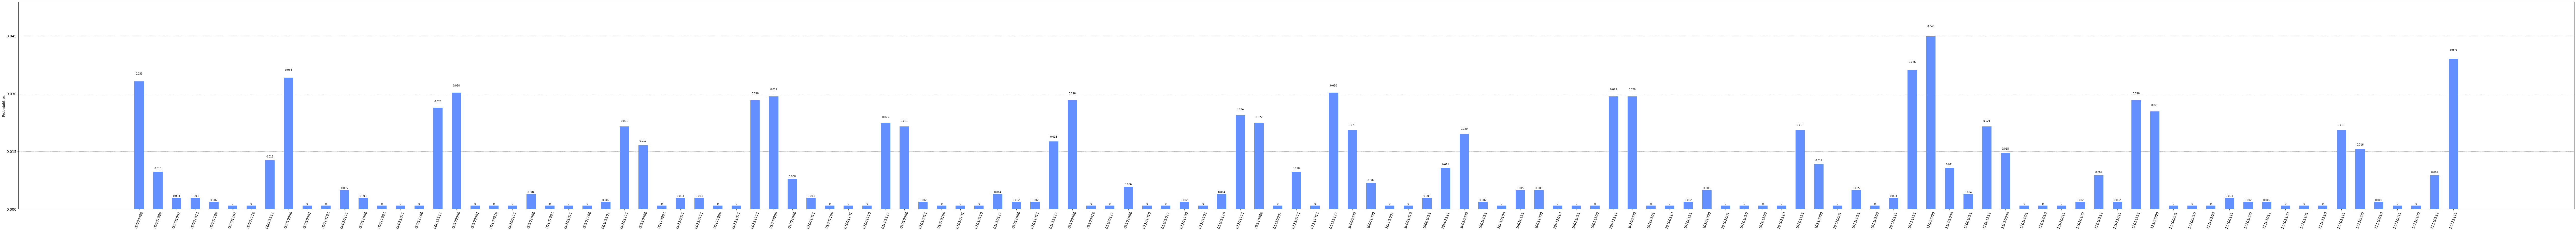

In [21]:
aer_sim = Aer.get_backend('aer_simulator')
t_qc = transpile(qc, aer_sim)
results = aer_sim.run(t_qc).result()
counts = results.get_counts()
plot_histogram(counts, figsize=(180, 15))

In [22]:
ss.measure_circuit()


Attempt 1:
Register Reading: 11110010
Corresponding Phase: 0.945312
Result: r = 128
Guessed Factors: 771 and 1

Attempt 2:
Register Reading: 11000110
Corresponding Phase: 0.773438
Result: r = 128
Guessed Factors: 771 and 1

Attempt 3:
Register Reading: 00011001
Corresponding Phase: 0.097656
Result: r = 256
Guessed Factors: 771 and 1

Attempt 4:
Register Reading: 11111101
Corresponding Phase: 0.988281
Result: r = 256
Guessed Factors: 771 and 1

Attempt 5:
Register Reading: 11111001
Corresponding Phase: 0.972656
Result: r = 256
Guessed Factors: 771 and 1

Attempt 6:
Register Reading: 00000000
Corresponding Phase: 0.000000
Result: r = 1

Attempt 7:
Register Reading: 00000000
Corresponding Phase: 0.000000
Result: r = 1

Attempt 8:
Register Reading: 11101110
Corresponding Phase: 0.929688
Result: r = 128
Guessed Factors: 771 and 1

Attempt 9:
Register Reading: 11111101
Corresponding Phase: 0.988281
Result: r = 256
Guessed Factors: 771 and 1

Attempt 10:
Register Reading: 00000111
Correspond